In [1]:
# Machine Learning for Business Applications
# Predicting customer churn with Data Science: ML models & Deep Learning (Keras)!

# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [2]:
#set display options

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.float_format', '{:,.3f}'.format)

In [3]:
#set color palette
sns.set_palette('Set2')
sns.set_palette('Paired')

In [4]:
#load dataset
df = pd.read_csv('data/cleaned_dataset_1.csv', index_col='customerID')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,False
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,"1,889.500",False
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,True
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,"1,840.750",False
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null bool
dtypes: bool(1), float64(2), int64(2), object(15)
memory usage: 1

In [6]:
active_df = df.loc[~df['Churn']]

In [8]:
inactive_df = df.loc[df['Churn']]

In [9]:
df['Tenure Category'] = pd.cut(df['tenure'],[-1, 6, 20, 40, 60, df['tenure'].max()], labels=['less than6', '6 to 20', '20 to 40', '40 to 60', 'more than 60'])

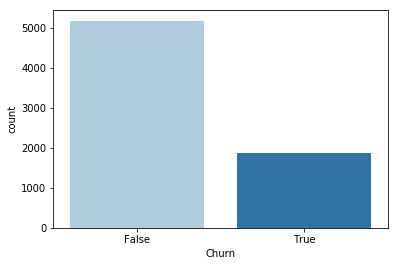

In [11]:
#countplot of # of Churn customers vs # of not Churn customers
sns.countplot('Churn', data=df)

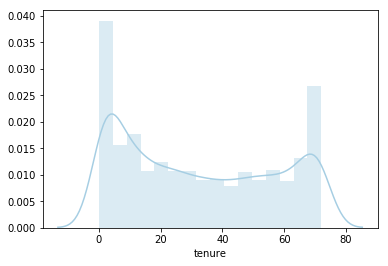

In [12]:
#distribution plot of tenure length
sns.distplot(df['tenure'])

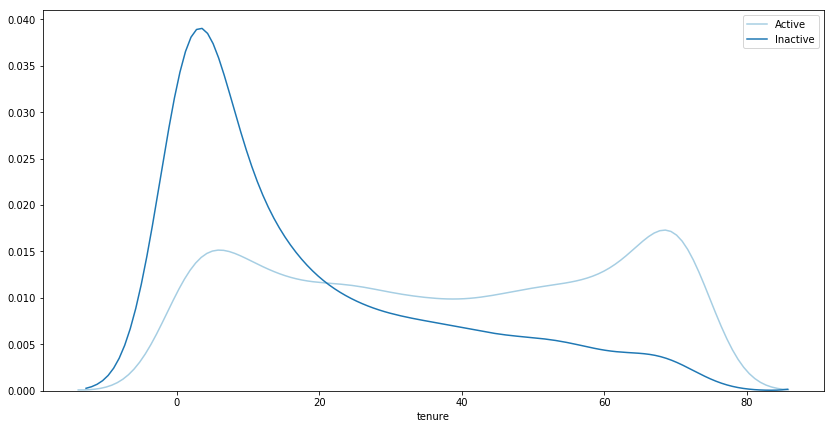

In [13]:
#Distribution of tenure length of Active and Inactive customers.
fig, ax = plt.subplots(figsize=(14,7))
sns.distplot(active_df['tenure'], label="Active", hist = False, ax=ax)
sns.distplot(inactive_df['tenure'], label="Inactive", hist = False, ax=ax)

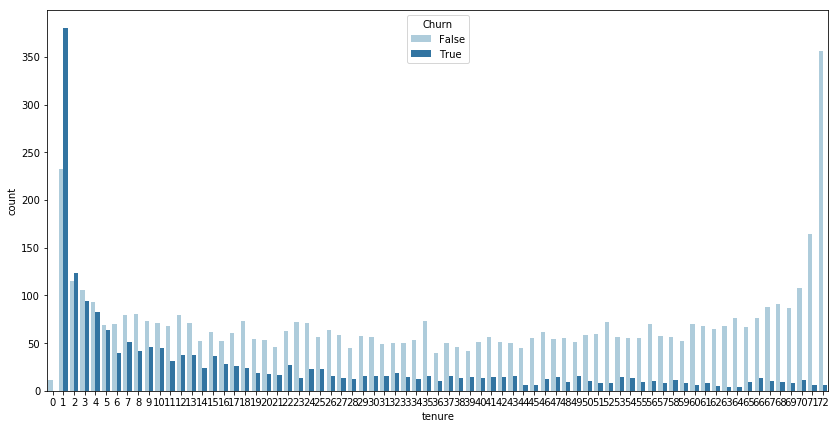

In [14]:
#Countplot of tenure length or Active and Inactive customers
fig, ax = plt.subplots(figsize=(14,7))
sns.countplot(x='tenure', hue='Churn', data=df, ax=ax)

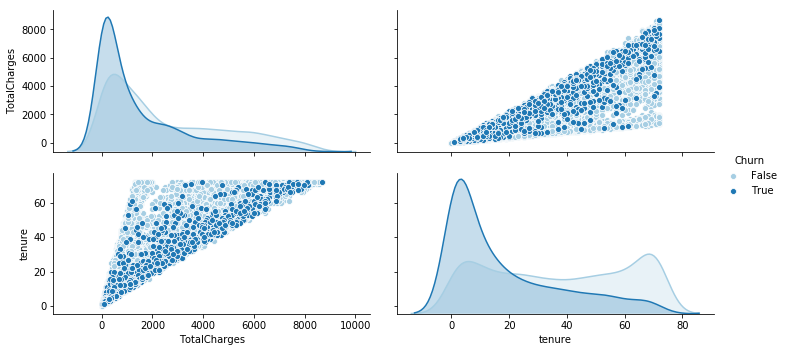

In [19]:
#pairplot of Churn due to TotalCharges and Tenure
sns.pairplot(df, hue='Churn', vars=['TotalCharges', 'tenure'], aspect=2)

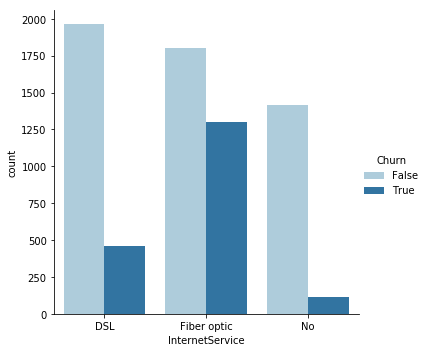

In [20]:
#category plot of Churn by internet service
sns.catplot(x="InternetService", kind="count", hue='Churn', data=df)

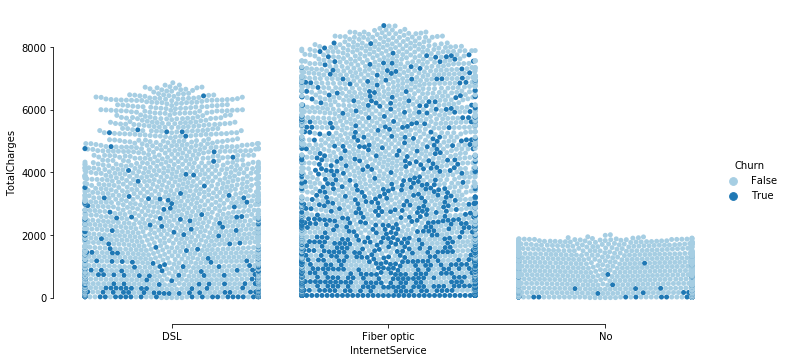

In [23]:
#category plot of Churn rate due to Total Charges and Internet Servives
sns.catplot(x='InternetService', y='TotalCharges', hue='Churn', kind='swarm', data=df, aspect=2)
sns.despine(offset=10, trim=True)

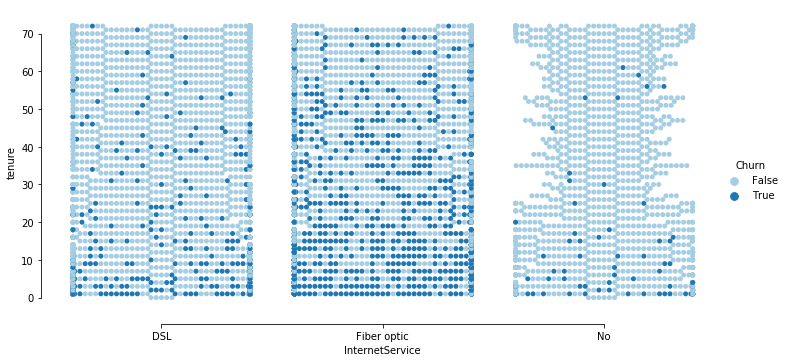

In [25]:
#category plot of Churn rate due to Tenure and Internet Services
sns.catplot(x='InternetService', y='tenure', hue='Churn', kind='swarm', data=df, aspect=2)
sns.despine(offset=10, trim=True)

In [26]:
#Online Services
import itertools

In [28]:
combinations = [
    [item for item in itertools.combinations(['Online Security', 'Online Backup', 'Device Protection'], i)]
        for i in range(1,4)]
[', '.join(elems) for elems in sum(combinations, [])]

['Online Security',
 'Online Backup',
 'Device Protection',
 'Online Security, Online Backup',
 'Online Security, Device Protection',
 'Online Backup, Device Protection',
 'Online Security, Online Backup, Device Protection']

In [30]:
internet_df = df.loc[df['InternetService'] != 'No']

In [32]:
internet_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Category
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,False,less than6
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,"1,889.500",False,20 to 40
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,True,less than6
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,"1,840.750",False,40 to 60
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,True,less than6


In [33]:
internet_df = internet_df.replace({
    'OnlineSecurity' : {
        'Yes' : True,
        'No' : False
    },
    'OnlineBackup' : {
        'Yes' : True,
        'No' : False
    },
    'DeviceProtection' : {
        'Yes' : True,
        'No' : False
    }
})

In [34]:
def expand_internet_category(row):
    services = set()
    if row['OnlineSecurity']:
        services.add('Online Security')
    if row['OnlineBackup']:
        services.add('Online Backup')
    if row['DeviceProtection']:
        services.add('Device Protection')
    
    if not services:
        return 'No Serives'
    
    return ", ".join(services)

In [35]:
internet_df['Combined Internet Services'] = internet_df.apply(expand_internet_category, axis=1)

In [36]:
internet_df['Combined Internet Services'].value_counts()

No Serives                                           1509
Device Protection, Online Security, Online Backup     693
Device Protection                                     686
Online Backup                                         678
Device Protection, Online Backup                      625
Online Security                                       475
Online Security, Online Backup                        433
Device Protection, Online Security                    418
Name: Combined Internet Services, dtype: int64

In [38]:
from pandas.api.types import CategoricalDtype

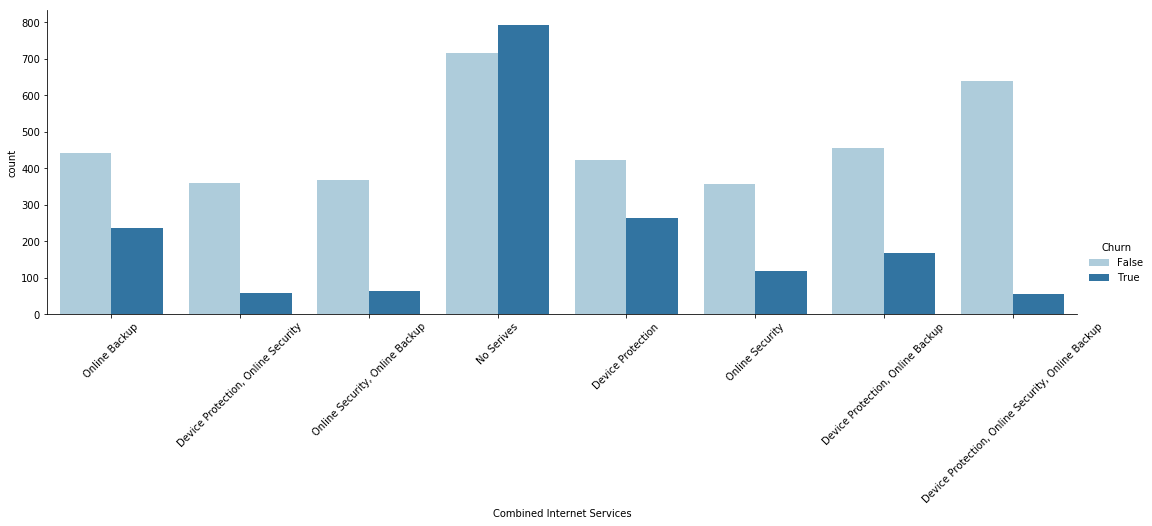

In [39]:
cat_plot = sns.catplot(x="Combined Internet Services", kind="count", hue='Churn', data = internet_df, aspect=3)
[plt.setp(ax.get_xticklabels(), rotation = 45) for ax in cat_plot.axes.flat]
cat_plot

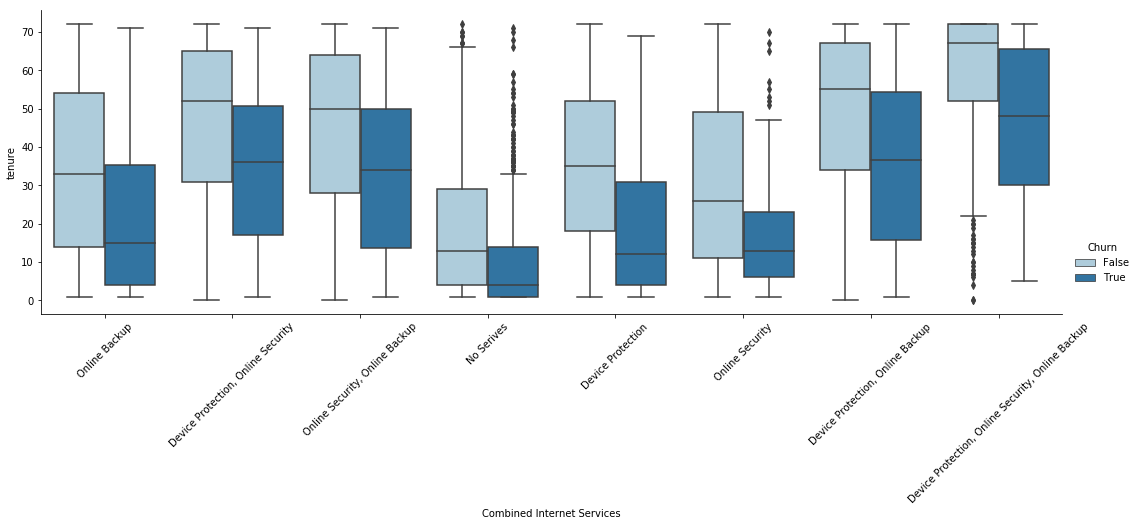

In [40]:
cat_plot = sns.catplot(x="Combined Internet Services", y='tenure', kind="box", hue='Churn', data = internet_df, aspect=3)
[plt.setp(ax.get_xticklabels(), rotation = 45) for ax in cat_plot.axes.flat]
cat_plot